In [127]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# 1 Least squares and linear basis functions models
## 1.1 Least squares

In [128]:
def compute_mse(y, tx, w):
    e = y - tx @ w
    return 1/2 * np.mean(e**2)

def compute_rmse(y, tx, w):
    mse = compute_mse(y, tx, w)
    return np.sqrt(2*mse)

def least_squares(y, tx):
    """calculate the least squares solution."""
    a = tx.T @ tx
    b = tx.T @ y
    w = np.linalg.solve(a,b)
    mse = compute_mse(y, tx, w)
    rmse = compute_rmse(y, tx, w)
    return mse, w

### Load the data
Here we will reuse the dataset `height_weight_genders.csv` from previous exercise section to check the correctness of your implementation. Please compare it with your previous result.

In [129]:
from helpers import *
from grad_descent_ex02 import *

def test_your_least_squares():
    height, weight, gender = load_data_from_ex02(sub_sample=False, add_outlier=False)
    x, mean_x, std_x = standardize(height)
    y, tx = build_model_data(x, weight)
    
    mse_ls, w_ls = least_squares(y,tx)
    
    mse_gd, w_gd = gradient_descent(y, tx, np.array([5, 10]), max_iters=50, gamma=0.2)
    
    print("\n", "Least Squares: ", (mse_ls, w_ls), "\n", "Gradient Descent: ", (mse_gd[-1], w_gd[-1]))
    #GD loss will be half the size due to 1/2 term (simply for convenience when taking derivative, does not change
    #optimization process)

Test it here

In [130]:
test_your_least_squares()

Gradient Descent(0/49): loss=2353.4699783987517, w0=18.658784400421034, w1=10.695942486997815
Gradient Descent(1/49): loss=1511.7597058079798, w0=29.585811920757834, w1=11.252696476596055
Gradient Descent(2/49): loss=973.065131349887, w0=38.327433937027294, w1=11.698099668274644
Gradient Descent(3/49): loss=628.3006036967067, w0=45.32073155004288, w1=12.054422221617513
Gradient Descent(4/49): loss=407.6513059986707, w0=50.91536964045533, w1=12.339480264291819
Gradient Descent(5/49): loss=266.43575547192813, w0=55.39108011278531, w1=12.56752669843126
Gradient Descent(6/49): loss=176.0578031348124, w0=58.97164849064929, w1=12.749963845742812
Gradient Descent(7/49): loss=118.21591363905853, w0=61.83610319294046, w1=12.895913563592057
Gradient Descent(8/49): loss=81.1971043617761, w0=64.1276669547734, w1=13.012673337871451
Gradient Descent(9/49): loss=57.50506642431533, w0=65.96091796423977, w1=13.106081157294971
Gradient Descent(10/49): loss=42.342162144340335, w0=67.42751877181286, w1=13

## 1.2 Least squares with a linear basis function model
Start from this section, we will use the dataset `dataEx3.csv`.

### Implement polynomial basis functions

In [131]:
# load dataset
x, y = load_data()
print("shape of x {}".format(x.shape))
print("shape of y {}".format(y.shape))

shape of x (50,)
shape of y (50,)


In [132]:
def build_poly(x, degree):
    """polynomial basis functions for input data x, for j=0 up to j=degree."""
    x = np.tile(np.array(x), (degree+1, 1)).transpose()
    pwrs = np.arange(0, degree+1)
    x = x**pwrs
    return x

Let us play with polynomial regression. Note that we will use your implemented function `compute_mse`. Please copy and paste your implementation from exercise02.

In [133]:
from plots import *

def polynomial_regression():
    """Constructing the polynomial basis function expansion of the data,
       and then running least squares regression."""
    # define parameters
    degrees = [1, 3, 7, 12]
    
    # define the structure of the figure
    num_row = 2
    num_col = 2
    f, axs = plt.subplots(num_row, num_col)

    for ind, degree in enumerate(degrees):
        tx = build_poly(x, degree)
        
        rmse, weights = least_squares(y, tx)
        

        print("Processing {i}th experiment, degree={d}, rmse={loss}".format(
              i=ind + 1, d=degree, loss=rmse))
        # plot fit
        plot_fitted_curve(
            y, x, weights, degree, axs[ind // num_col][ind % num_col])
    plt.tight_layout()
    plt.savefig("visualize_polynomial_regression")
    plt.show()

Run polynomial regression

Processing 1th experiment, degree=1, rmse=0.11133351726547978
Processing 2th experiment, degree=3, rmse=0.033432526197090556
Processing 3th experiment, degree=7, rmse=0.03116473414388155
Processing 4th experiment, degree=12, rmse=0.029593181281475856


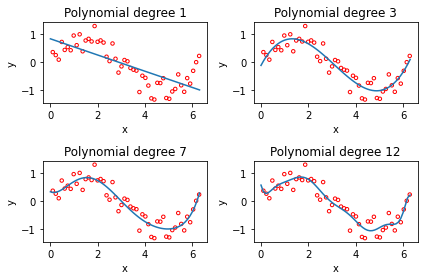

In [134]:
polynomial_regression()
#Best model seems to be 3rd order polynomial. Simplest model that fits the data and RMSE comparable to that of 7th and
# 12th order models

# 2 Evaluating model predication performance


Let us show the train and test splits for various polynomial degrees. First of all, please fill in the function `split_data()`

In [135]:
def split_data(x, y, ratio, seed=1):
    """
    split the dataset based on the split ratio. If ratio is 0.8 
    you will have 80% of your data set dedicated to training 
    and the rest dedicated to testing
    """
    # set seed
    np.random.seed(seed)
    
    split = int(ratio * x.shape[0])
    train_ind = np.random.permutation(np.arange(x.shape[0]))[:split]
    test_ind = np.random.permutation(np.arange(x.shape[0]))[split:]
    
    x_tr, y_tr = x[train_ind], y[train_ind]
    x_te, y_te = x[test_ind], y[test_ind]
    
    return x_tr, y_tr, x_te, y_te

Then, test your `split_data` function below.

In [136]:
def train_test_split_demo(x, y, degree, ratio, seed):
    """polynomial regression with different split ratios and different degrees."""
    
    x_tr, y_tr, x_te, y_te = split_data(x, y, ratio)
    
    x_tr = build_poly(x_tr, degree)
    
    x_te = build_poly(x_te, degree)

    mse_tr, w = least_squares(y_tr, x_tr)
    rmse_tr = compute_rmse(y_tr, x_tr, w)
    rmse_te = compute_rmse(y_te, x_te, w)
    
    print("proportion={p}, degree={d}, Training RMSE={tr:.3f}, Testing RMSE={te:.3f}".format(
          p=ratio, d=degree, tr=rmse_tr, te=rmse_te))

In [137]:
seed = 6
degrees = [1, 3, 7, 12]
split_ratios = [0.9, 0.5, 0.1]

for split_ratio in split_ratios:
    for degree in degrees:
        train_test_split_demo(x, y, degree, split_ratio, seed)

proportion=0.9, degree=1, Training RMSE=0.455, Testing RMSE=0.207
proportion=0.9, degree=3, Training RMSE=0.264, Testing RMSE=0.183
proportion=0.9, degree=7, Training RMSE=0.257, Testing RMSE=0.206
proportion=0.9, degree=12, Training RMSE=0.248, Testing RMSE=0.168
proportion=0.5, degree=1, Training RMSE=0.400, Testing RMSE=0.494
proportion=0.5, degree=3, Training RMSE=0.237, Testing RMSE=0.293
proportion=0.5, degree=7, Training RMSE=0.218, Testing RMSE=0.307
proportion=0.5, degree=12, Training RMSE=0.213, Testing RMSE=0.315
proportion=0.1, degree=1, Training RMSE=0.453, Testing RMSE=0.728
proportion=0.1, degree=3, Training RMSE=0.111, Testing RMSE=0.656
proportion=0.1, degree=7, Training RMSE=0.000, Testing RMSE=1.275
proportion=0.1, degree=12, Training RMSE=0.000, Testing RMSE=2.816


# 3 Ridge Regression
Please fill in the function below.

In [138]:
def ridge_regression(y, tx, lambda_):
    """implement ridge regression."""
    
    a = tx.T @ tx + 2 * lambda_ * tx.shape[0] * np.eye(tx.shape[1])
    b = tx.T @ y
    
    w = np.linalg.solve(a, b)
    
    mse = compute_mse(y, tx, w)
    rmse = compute_rmse(y, tx, w)
    
    return mse, w

In [139]:
def ridge_regression_demo(x, y, degree, ratio, seed):
    """ridge regression demo."""
    # define parameter
    lambdas = np.logspace(-5, 0, 15)
    
    x_tr, y_tr, x_te, y_te = split_data(x, y, ratio, seed)
    
    x_tr = build_poly(x_tr, degree)
    
    x_te = build_poly(x_te, degree)
    

    rmse_tr = []
    rmse_te = []
    for ind, lambda_ in enumerate(lambdas):
        mse_tr, w = ridge_regression(y_tr, x_tr, lambda_)
        
        rmse_tr.append(compute_rmse(y_tr, x_tr, w))
        rmse_te.append(compute_rmse(y_te, x_te, w))
        
        print("proportion={p}, degree={d}, lambda={l:.3f}, Training RMSE={tr:.3f}, Testing RMSE={te:.3f}".format(
               p=ratio, d=degree, l=lambda_, tr=rmse_tr[ind], te=rmse_te[ind]))
        
    # Plot the obtained results
    plot_train_test(rmse_tr, rmse_te, lambdas, degree)



proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.227, Testing RMSE=0.298
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.227, Testing RMSE=0.297
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.227, Testing RMSE=0.297
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.227, Testing RMSE=0.297
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.228, Testing RMSE=0.296
proportion=0.5, degree=7, lambda=0.001, Training RMSE=0.228, Testing RMSE=0.296
proportion=0.5, degree=7, lambda=0.001, Training RMSE=0.229, Testing RMSE=0.293
proportion=0.5, degree=7, lambda=0.003, Training RMSE=0.230, Testing RMSE=0.285
proportion=0.5, degree=7, lambda=0.007, Training RMSE=0.232, Testing RMSE=0.273
proportion=0.5, degree=7, lambda=0.016, Training RMSE=0.237, Testing RMSE=0.260
proportion=0.5, degree=7, lambda=0.037, Training RMSE=0.246, Testing RMSE=0.260
proportion=0.5, degree=7, lambda=0.085, Training RMSE=0.264, Testing RMSE=0.285
proportion=0.5, degree=7, lambda=0.193, 

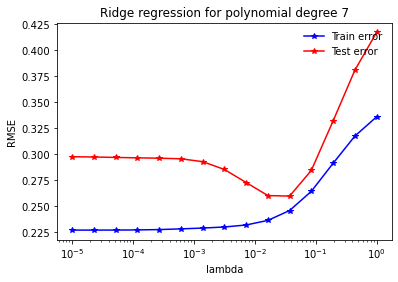

In [140]:
seed = 56
degree = 7
split_ratio = 0.5
ridge_regression_demo(x, y, degree, split_ratio, seed)